In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('diabetes.csv')

df_first = df[df['Outcome'] == 0]
df_second = df[df['Outcome'] == 1]

In [21]:
df_target = df_first

n = len(df_target)

n_glucose = sum(df_target['Glucose'] > 0)
n_insulin = sum(df_target['Insulin'] > 0)

avg_ln_glucose = 1 / n_glucose * sum(np.log(gl_val) for gl_val in df_target['Glucose'] if gl_val > 0)
avg_ln_insulin = 1 / n_insulin * sum(np.log(ins_val) for ins_val in df_target['Insulin'] if ins_val > 0)

S_2_glucose = 1 / n_glucose * sum((np.log(gl_val) - avg_ln_glucose) ** 2 for gl_val in df_target['Glucose'] if gl_val > 0)
S_2_insulin = 1 / n_insulin * sum((np.log(ins_val) - avg_ln_insulin) ** 2 for ins_val in df_target['Insulin'] if ins_val > 0)

beta_ = (S_2_glucose / S_2_insulin) ** .5
alpha_ = np.exp(avg_ln_glucose - beta_ * avg_ln_insulin)

194.0

0.46599999999999997
0.10357407871234438
264


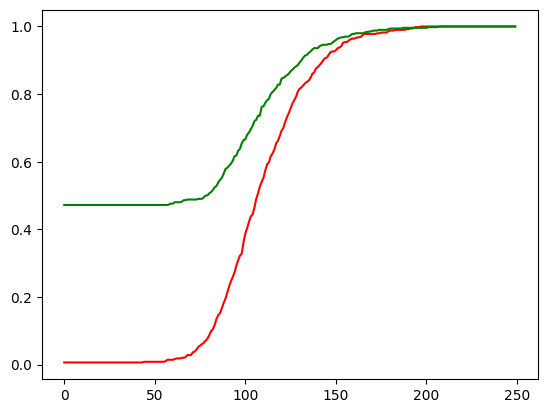

In [78]:
df_target = df_first

fact_distribution_glucose = lambda x: sum(df_target['Glucose'] <= x) / len(df_target)
pred_distribution_glucose = lambda x: sum((alpha_ * df_target['Insulin'] ** beta_) <= x) / len(df_target)

x = np.arange(0, 250, 1)

plt.plot(x, [fact_distribution_glucose(i) for i in x], color='red', label='Функция распределения значения уровня глюкозы выборки')
plt.plot(x, [pred_distribution_glucose(i) for i in x], color='green', label='Функция распределения значения уровня глюкозы по значению уровня инсулину')

print(max([abs(fact_distribution_glucose(i) - pred_distribution_glucose(i)) for i in x]))
# print(1.36 * ((n_glucose + n_insulin) / (n_glucose * n_insulin)) ** .5)

plt.show()